# Pojazdy wg rodzajów w 2021 r.
Zbiór dotyczy ilości rejestrowanych pojazdów w poszczególnych miesiącach 2021r. z podziałem na ich rodzaje.
[Źródło danych](https://dane.gov.pl/pl/dataset/440/resource/36010,pojazdy-wg-rodzajow-w-2021-r/table)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

In [2]:
df = pd.read_csv('../data/Pojazdy_wg_rodzajów_2021.csv', sep=';', encoding='windows-1250')
df.head()

,RODZAJ,styczeń,luty,marzec,kwiecień,maj,czerwiec,lipiec,sierpień,wrzesień,październik,listopad,grudzień
0,AUTOBUS,259.0,267.0,334.0,215.0,329.0,358.0,351.0,568.0,434.0,307.0,327.0,445
1,CIĄGNIK ROLNICZY,2561.0,3538.0,4718.0,4032.0,3921.0,3694.0,3475.0,3175.0,3421.0,3272.0,3261.0,4 482
2,CIĄGNIK SAMOCHODOWY,2449.0,3809.0,4477.0,4103.0,3694.0,3459.0,3448.0,2627.0,3562.0,3832.0,3543.0,4 124
3,MOTOCYKL,3151.0,4251.0,9449.0,10452.0,10460.0,10293.0,8928.0,6896.0,5683.0,4756.0,4109.0,3 983
4,MOTOROWER,791.0,869.0,1837.0,2192.0,2772.0,2954.0,2998.0,2615.0,1967.0,1475.0,1210.0,1 553


In [3]:
df.describe()

,styczeń,luty,marzec,kwiecień,maj,czerwiec,lipiec,sierpień,wrzesień,październik,listopad
count,15.000000,15.000000,16.000000,16.000000,16.00000,15.000000,15.000000,15.000000,16.000000,16.000000,15.000000
mean,8193.466667,9373.866667,11753.625000,10499.250000,10655.31250,11728.000000,10867.866667,9807.400000,9334.500000,8973.000000,9150.133333
std,23225.868364,25940.119655,32322.162289,27945.282427,28468.46203,30847.537119,29151.339817,26806.390698,26571.848514,25574.227183,25081.015111
min,10.000000,18.000000,1.000000,10.000000,3.00000,9.000000,9.000000,18.000000,2.000000,1.000000,4.000000
25%,657.500000,743.500000,920.500000,931.750000,868.25000,1243.500000,1031.000000,772.000000,662.250000,598.750000,792.500000
50%,1770.000000,1925.000000,2207.000000,2310.000000,2547.50000,2954.000000,2998.000000,2615.000000,2069.000000,1828.500000,1959.000000
75%,2856.000000,3733.500000,5178.500000,4879.000000,4765.75000,5057.000000,4562.500000,3909.500000,3805.250000,3962.750000,3767.500000
max,91494.000000,102358.000000,131768.000000,114125.000000,116253.00000,122156.000000,115553.000000,106037.000000,108233.000000,104131.000000,99049.000000


In [4]:
df.isna().sum()/df.shape[0]

RODZAJ         0.000000
styczeń        0.117647
luty           0.117647
marzec         0.058824
kwiecień       0.058824
maj            0.058824
czerwiec       0.117647
lipiec         0.117647
sierpień       0.117647
wrzesień       0.058824
październik    0.058824
listopad       0.117647
grudzień       0.117647
dtype: float64

In [5]:
df.fillna(0, inplace=True)
df

,RODZAJ,styczeń,luty,marzec,kwiecień,maj,czerwiec,lipiec,sierpień,wrzesień,październik,listopad,grudzień
0,AUTOBUS,259.0,267.0,334.0,215.0,329.0,358.0,351.0,568.0,434.0,307.0,327.0,445
1,CIĄGNIK ROLNICZY,2561.0,3538.0,4718.0,4032.0,3921.0,3694.0,3475.0,3175.0,3421.0,3272.0,3261.0,4 482
2,CIĄGNIK SAMOCHODOWY,2449.0,3809.0,4477.0,4103.0,3694.0,3459.0,3448.0,2627.0,3562.0,3832.0,3543.0,4 124
3,MOTOCYKL,3151.0,4251.0,9449.0,10452.0,10460.0,10293.0,8928.0,6896.0,5683.0,4756.0,4109.0,3 983
4,MOTOROWER,791.0,869.0,1837.0,2192.0,2772.0,2954.0,2998.0,2615.0,1967.0,1475.0,1210.0,1 553
5,NACZEPA CIĘŻAROWA,2515.0,3514.0,4687.0,4259.0,3765.0,3856.0,4059.0,3338.0,3653.0,3944.0,3698.0,3 587
6,NACZEPA SPECJALNA,10.0,18.0,11.0,11.0,6.0,9.0,9.0,18.0,2.0,13.0,4.0,6
7,PRZYCZEPA CIĘŻAROWA,1770.0,1925.0,2577.0,2428.0,2323.0,2247.0,2293.0,1978.0,2171.0,2182.0,1959.0,2 015
8,PRZYCZ.CIĘŻAROWA ROLNICZA,751.0,908.0,1346.0,1203.0,1428.0,1521.0,1978.0,1153.0,912.0,942.0,968.0,1 130
9,PRZYCZEPA LEKKA,3523.0,3658.0,6560.0,6739.0,7300.0,6258.0,5066.0,4481.0,4262.0,4019.0,3837.0,3 412


In [6]:
def remove_space(x: str):
    if x == 0 or x == '0':
        return 0
    return x.replace(' ', '')

df['grudzień'] = df['grudzień'].apply(remove_space)
df

,RODZAJ,styczeń,luty,marzec,kwiecień,maj,czerwiec,lipiec,sierpień,wrzesień,październik,listopad,grudzień
0,AUTOBUS,259.0,267.0,334.0,215.0,329.0,358.0,351.0,568.0,434.0,307.0,327.0,445
1,CIĄGNIK ROLNICZY,2561.0,3538.0,4718.0,4032.0,3921.0,3694.0,3475.0,3175.0,3421.0,3272.0,3261.0,4482
2,CIĄGNIK SAMOCHODOWY,2449.0,3809.0,4477.0,4103.0,3694.0,3459.0,3448.0,2627.0,3562.0,3832.0,3543.0,4124
3,MOTOCYKL,3151.0,4251.0,9449.0,10452.0,10460.0,10293.0,8928.0,6896.0,5683.0,4756.0,4109.0,3983
4,MOTOROWER,791.0,869.0,1837.0,2192.0,2772.0,2954.0,2998.0,2615.0,1967.0,1475.0,1210.0,1553
5,NACZEPA CIĘŻAROWA,2515.0,3514.0,4687.0,4259.0,3765.0,3856.0,4059.0,3338.0,3653.0,3944.0,3698.0,3587
6,NACZEPA SPECJALNA,10.0,18.0,11.0,11.0,6.0,9.0,9.0,18.0,2.0,13.0,4.0,6
7,PRZYCZEPA CIĘŻAROWA,1770.0,1925.0,2577.0,2428.0,2323.0,2247.0,2293.0,1978.0,2171.0,2182.0,1959.0,2015
8,PRZYCZ.CIĘŻAROWA ROLNICZA,751.0,908.0,1346.0,1203.0,1428.0,1521.0,1978.0,1153.0,912.0,942.0,968.0,1130
9,PRZYCZEPA LEKKA,3523.0,3658.0,6560.0,6739.0,7300.0,6258.0,5066.0,4481.0,4262.0,4019.0,3837.0,3412


C:\Users\Michal\AppData\Local\Temp\ipykernel_20120\1141960099.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = df.iloc[:, 1:].sum()


Text(0.5, 1.0, 'Liczba zarejestrowanych pojazdów w poszczególnych miesiącach')

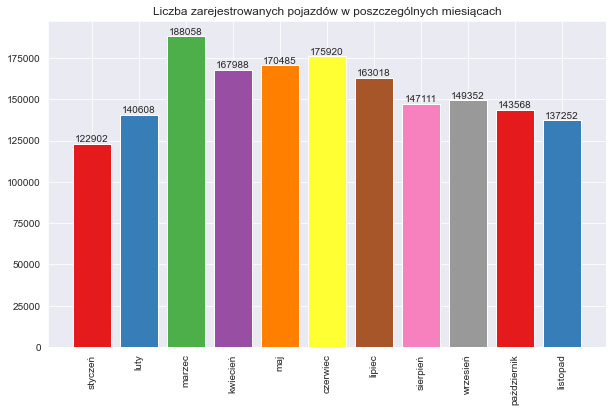

In [7]:
data = df.iloc[:, 1:].sum()
fig, ax = plt.subplots(figsize=(10, 6))
my_cmap = plt.get_cmap("Set1")
bars = ax.bar(data.index.values, data, color=my_cmap.colors)
ax.bar_label(bars)
plt.xticks(rotation=90)
plt.title('Liczba zarejestrowanych pojazdów w poszczególnych miesiącach')

Text(0.5, 1.0, 'Udział poszczególnych rodzajów samochodów w styczniu')

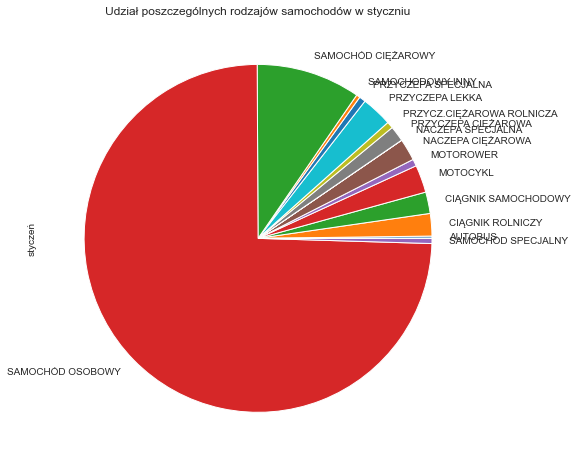

In [8]:
df['styczeń'].plot(kind='pie', labels=df['RODZAJ'], figsize=(15, 8))
plt.title('Udział poszczególnych rodzajów samochodów w styczniu')

In [9]:
df.set_index('RODZAJ', inplace=True)
df = df.T
df = df.astype(np.int64)
df

RODZAJ,AUTOBUS,CIĄGNIK ROLNICZY,CIĄGNIK SAMOCHODOWY,MOTOCYKL,MOTOROWER,NACZEPA CIĘŻAROWA,NACZEPA SPECJALNA,PRZYCZEPA CIĘŻAROWA,PRZYCZ.CIĘŻAROWA ROLNICZA,PRZYCZEPA LEKKA,PRZYCZEPA SPECJALNA,SAMOCHODOWY INNY,SAMOCHÓD CIĘŻAROWY,SAMOCHÓD OSOBOWY,SAMOCHÓD SPECJALNY,KOLEJKA TURYSTYCZNA,TROLEJBUS
styczeń,259,2561,2449,3151,791,2515,10,1770,751,3523,730,424,11889,91494,585,0,0
luty,267,3538,3809,4251,869,3514,18,1925,908,3658,782,447,13559,102358,705,0,0
marzec,334,4718,4477,9449,1837,4687,11,2577,1346,6560,1154,580,17525,131768,1034,1,0
kwiecień,215,4032,4103,10452,2192,4259,11,2428,1203,6739,1341,607,15231,114125,1040,0,10
maj,329,3921,3694,10460,2772,3765,6,2323,1428,7300,1338,638,15310,116253,945,3,0
czerwiec,358,3694,3459,10293,2954,3856,9,2247,1521,6258,1383,571,16057,122156,1104,0,0
lipiec,351,3475,3448,8928,2998,4059,9,2293,1978,5066,1133,558,12240,115553,929,0,0
sierpień,568,3175,2627,6896,2615,3338,18,1978,1153,4481,821,453,12228,106037,723,0,0
wrzesień,434,3421,3562,5683,1967,3653,2,2171,912,4262,743,486,13099,108233,721,3,0
październik,307,3272,3832,4756,1475,3944,13,2182,942,4019,661,412,12917,104131,704,1,0


Text(0.5, 1.0, 'Liczba zarejestrowanych pojazdów w tysiącach')

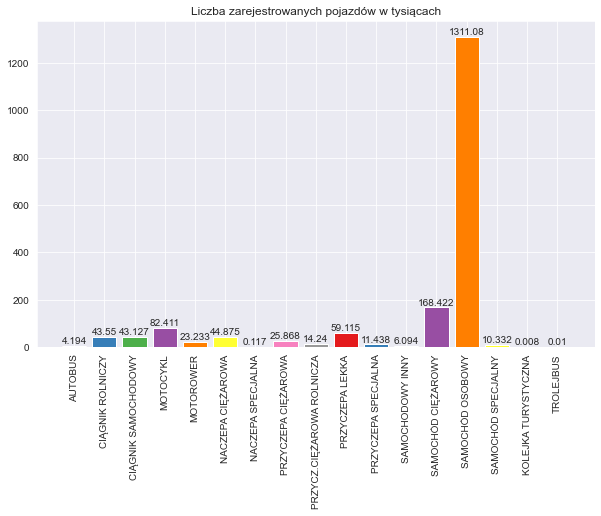

In [10]:
data = df.sum() / 1000
fig, ax = plt.subplots(figsize=(10, 6))
my_cmap = plt.get_cmap("Set1")
bars = ax.bar(data.index.values, data, color=my_cmap.colors)
ax.bar_label(bars)
plt.xticks(rotation=90)
plt.title('Liczba zarejestrowanych pojazdów w tysiącach')

Text(0.5, 1.0, 'Średnia liczba rejestrowanych pojazdów na miesiąc')

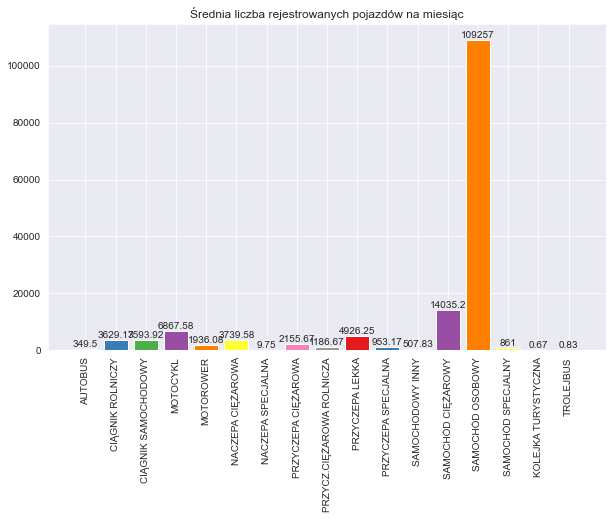

In [11]:
data = np.round(df.mean(), 2)
fig, ax = plt.subplots(figsize=(10, 6))
my_cmap = plt.get_cmap("Set1")
bars = ax.bar(data.index.values, data, color=my_cmap.colors)
ax.bar_label(bars)
plt.xticks(rotation=90)
plt.title('Średnia liczba rejestrowanych pojazdów na miesiąc')

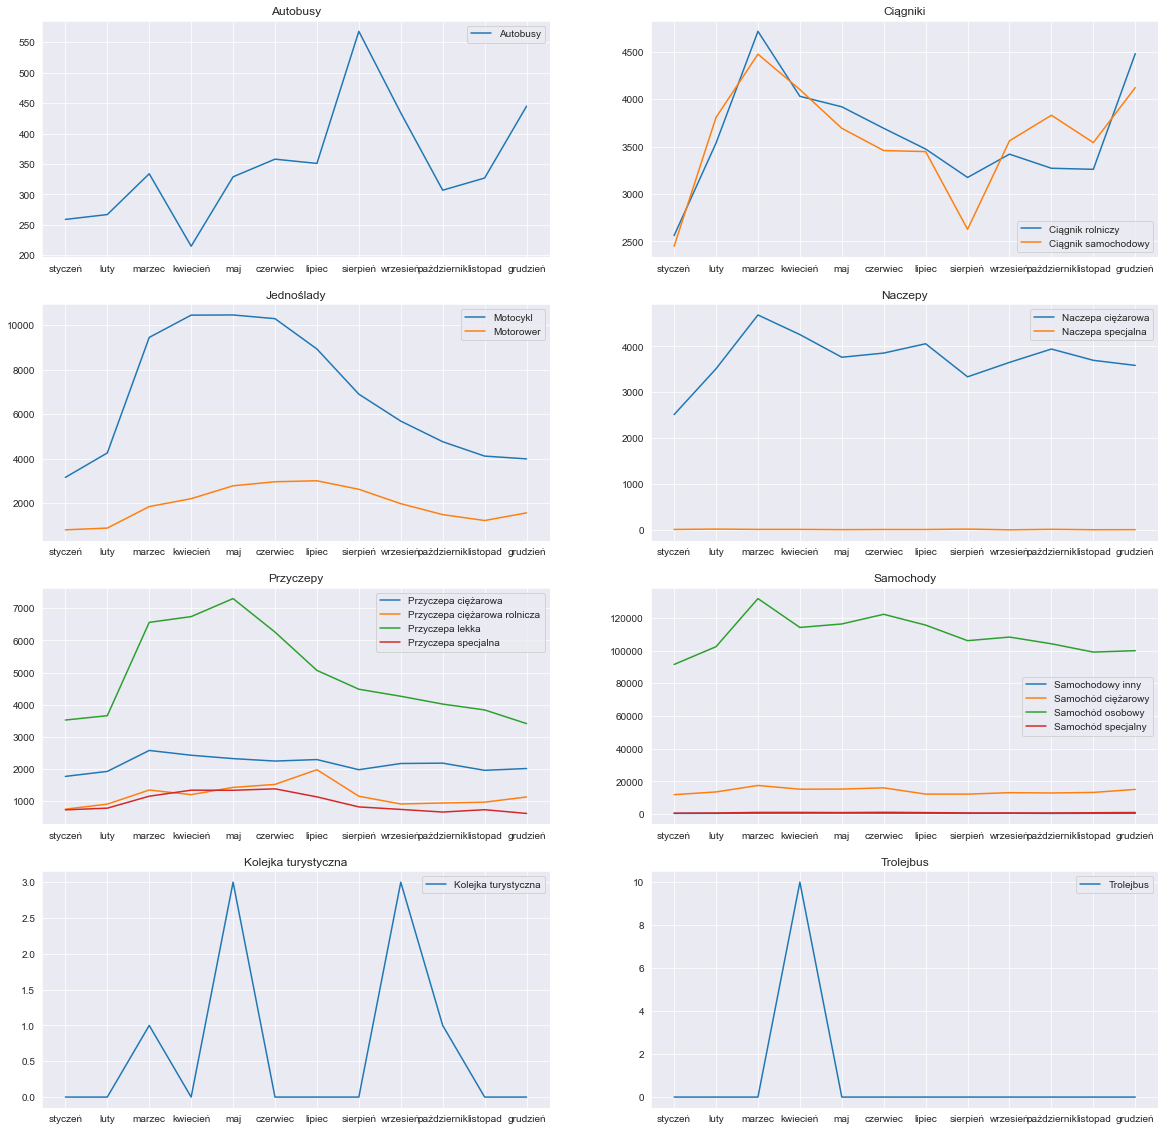

In [12]:
# ilość rejestrowanych pojazdów w poszczególnych miesiącach
fig, axs = plt.subplots(4, 2,figsize=(20, 20))
axs[0, 0].plot(df.index.values, df['AUTOBUS'], label='Autobusy')
axs[0, 0].set_title('Autobusy')
axs[0, 0].legend()
axs[0, 1].plot(df.index.values, df['CIĄGNIK ROLNICZY'], label='Ciągnik rolniczy')
axs[0, 1].plot(df.index.values, df['CIĄGNIK SAMOCHODOWY'], label='Ciągnik samochodowy')
axs[0, 1].set_title('Ciągniki')
axs[0, 1].legend()
axs[1, 0].plot(df.index.values, df['MOTOCYKL'], label='Motocykl')
axs[1, 0].plot(df.index.values, df['MOTOROWER'], label='Motorower')
axs[1, 0].set_title('Jednoślady')
axs[1, 0].legend()
axs[1, 1].plot(df.index.values, df['NACZEPA CIĘŻAROWA'], label='Naczepa ciężarowa')
axs[1, 1].plot(df.index.values, df['NACZEPA SPECJALNA'], label='Naczepa specjalna')
axs[1, 1].set_title('Naczepy')
axs[1, 1].legend()
axs[2, 0].plot(df.index.values, df['PRZYCZEPA CIĘŻAROWA'], label='Przyczepa ciężarowa')
axs[2, 0].plot(df.index.values, df['PRZYCZ.CIĘŻAROWA ROLNICZA'], label='Przyczepa ciężarowa rolnicza')
axs[2, 0].plot(df.index.values, df['PRZYCZEPA LEKKA'], label='Przyczepa lekka')
axs[2, 0].plot(df.index.values, df['PRZYCZEPA SPECJALNA'], label='Przyczepa specjalna')
axs[2, 0].set_title('Przyczepy')
axs[2, 0].legend()
axs[2, 1].plot(df.index.values, df['SAMOCHODOWY INNY'], label='Samochodowy inny')
axs[2, 1].plot(df.index.values, df['SAMOCHÓD CIĘŻAROWY'], label='Samochód ciężarowy')
axs[2, 1].plot(df.index.values, df['SAMOCHÓD OSOBOWY'], label='Samochód osobowy')
axs[2, 1].plot(df.index.values, df['SAMOCHÓD SPECJALNY'], label='Samochód specjalny')
axs[2, 1].set_title('Samochody')
axs[2, 1].legend()
axs[3, 0].plot(df.index.values, df['KOLEJKA TURYSTYCZNA'], label='Kolejka turystyczna')
axs[3, 0].set_title('Kolejka turystyczna')
axs[3, 0].legend()
axs[3, 1].plot(df.index.values, df['TROLEJBUS'], label='Trolejbus')
axs[3, 1].set_title('Trolejbus')
axs[3, 1].legend()

<AxesSubplot:xlabel='RODZAJ', ylabel='RODZAJ'>

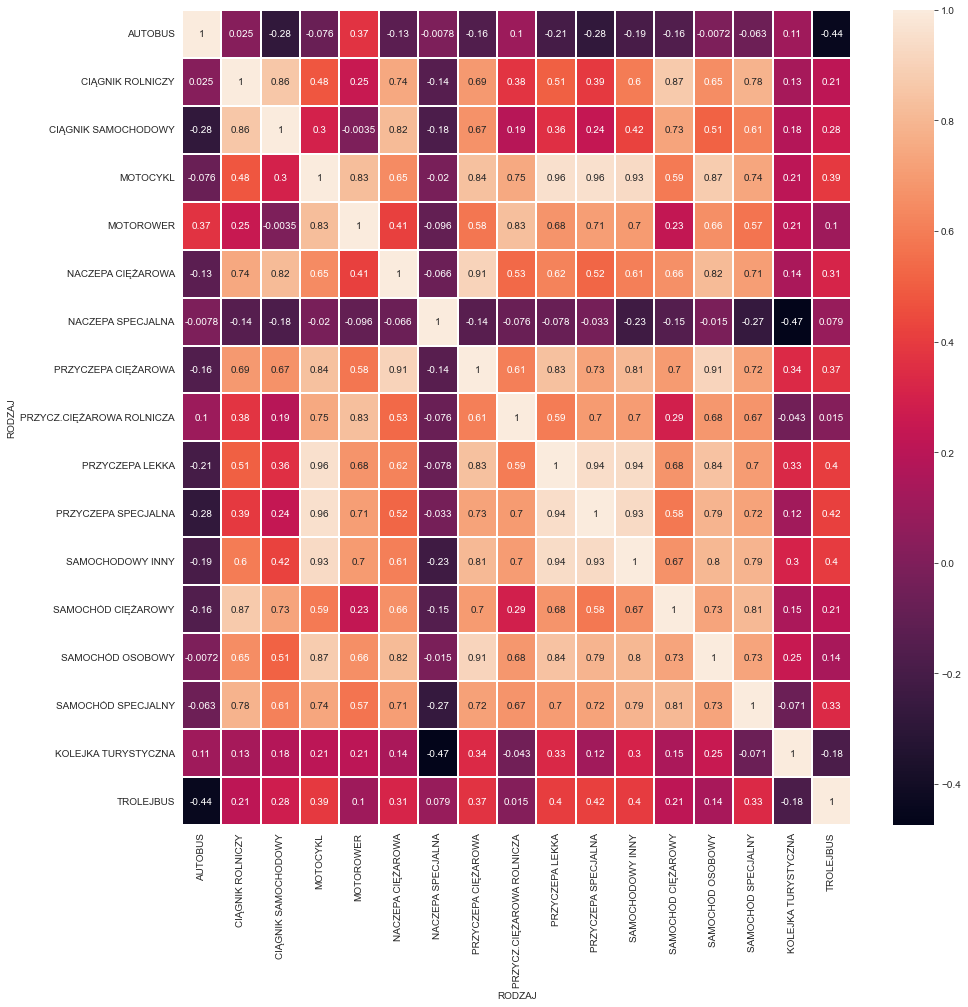

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.3)

Text(0.5, 1.0, 'Trolejbus')

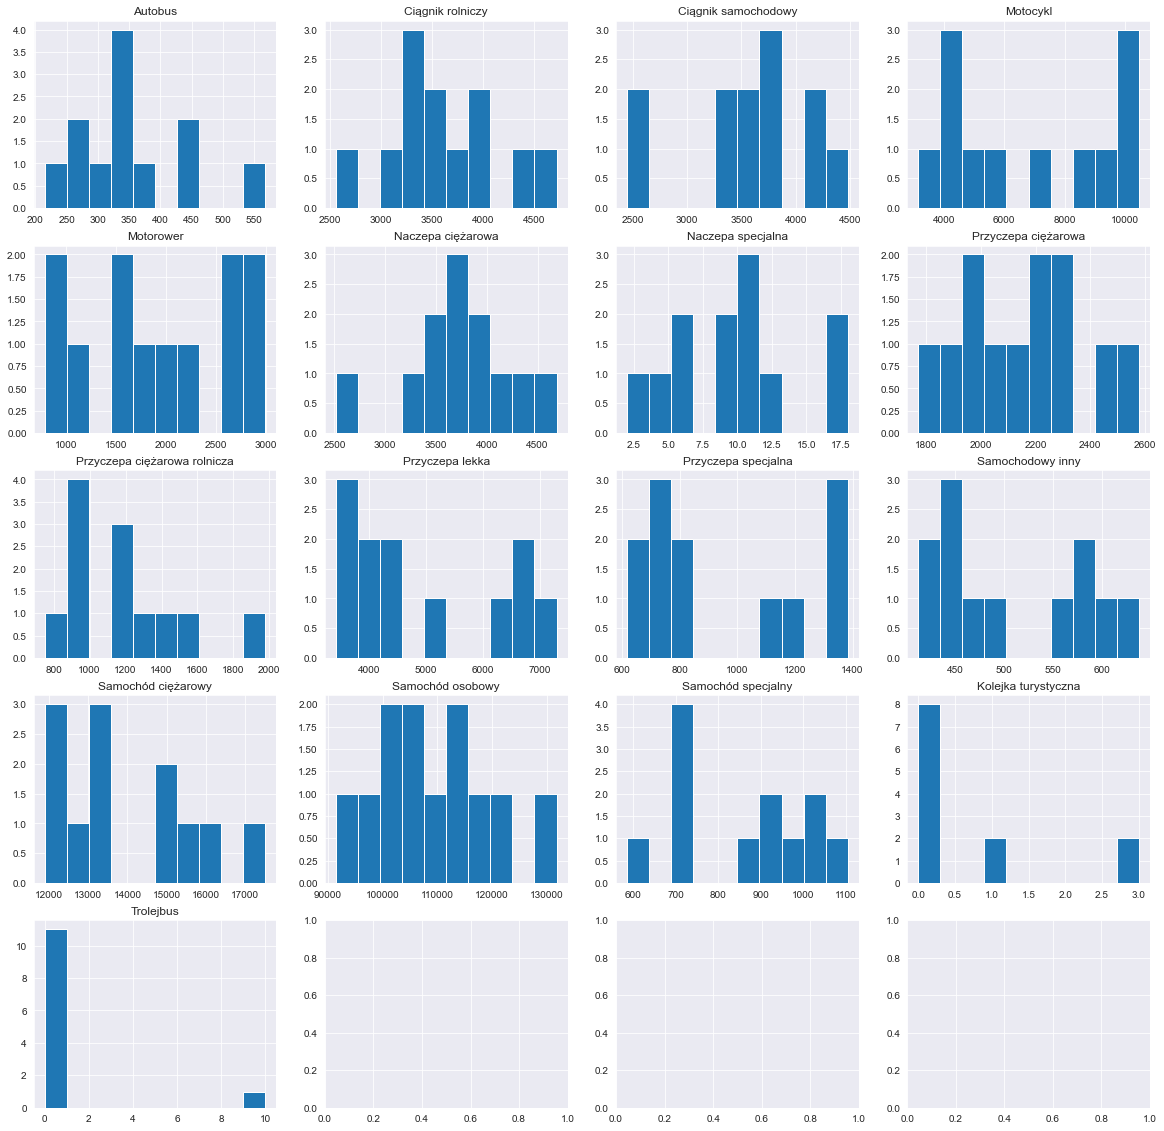

In [14]:
# częstość rejestrowania różnych ilości pojazdów w miesiącach
fig, axs = plt.subplots(5, 4,figsize=(20, 20))
axs[0,0].hist(df['AUTOBUS'])
axs[0,0].set_title('Autobus')
axs[0,1].hist(df['CIĄGNIK ROLNICZY'])
axs[0,1].set_title('Ciągnik rolniczy')
axs[0,2].hist(df['CIĄGNIK SAMOCHODOWY'])
axs[0,2].set_title('Ciągnik samochodowy')
axs[0,3].hist(df['MOTOCYKL'])
axs[0,3].set_title('Motocykl')
axs[1,0].hist(df['MOTOROWER'])
axs[1,0].set_title('Motorower')
axs[1,1].hist(df['NACZEPA CIĘŻAROWA'])
axs[1,1].set_title('Naczepa ciężarowa')
axs[1,2].hist(df['NACZEPA SPECJALNA'])
axs[1,2].set_title('Naczepa specjalna')
axs[1,3].hist(df['PRZYCZEPA CIĘŻAROWA'])
axs[1,3].set_title('Przyczepa ciężarowa')
axs[2,0].hist(df['PRZYCZ.CIĘŻAROWA ROLNICZA'])
axs[2,0].set_title('Przyczepa ciężarowa rolnicza')
axs[2,1].hist(df['PRZYCZEPA LEKKA'])
axs[2,1].set_title('Przyczepa lekka')
axs[2,2].hist(df['PRZYCZEPA SPECJALNA'])
axs[2,2].set_title('Przyczepa specjalna')
axs[2,3].hist(df['SAMOCHODOWY INNY'])
axs[2,3].set_title('Samochodowy inny')
axs[3,0].hist(df['SAMOCHÓD CIĘŻAROWY'])
axs[3,0].set_title('Samochód ciężarowy')
axs[3,1].hist(df['SAMOCHÓD OSOBOWY'])
axs[3,1].set_title('Samochód osobowy')
axs[3,2].hist(df['SAMOCHÓD SPECJALNY'])
axs[3,2].set_title('Samochód specjalny')
axs[3,3].hist(df['KOLEJKA TURYSTYCZNA'])
axs[3,3].set_title('Kolejka turystyczna')
axs[4,0].hist(df['TROLEJBUS'])
axs[4,0].set_title('Trolejbus')

Text(0.5, 1.0, 'Trolejbus')

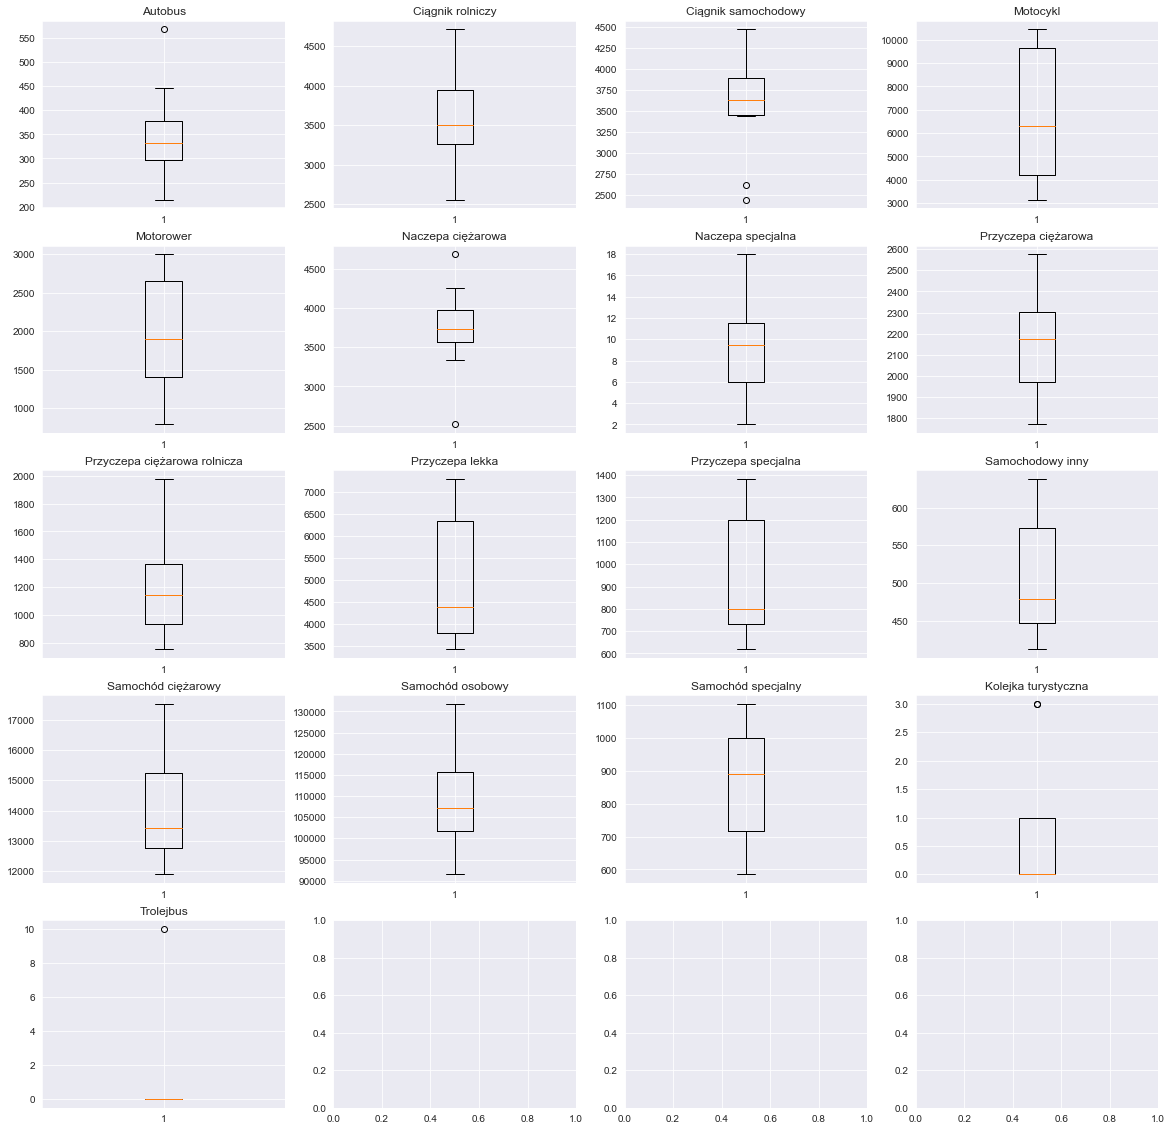

In [15]:
fig, axs = plt.subplots(5, 4,figsize=(20, 20))
axs[0,0].boxplot(df['AUTOBUS'])
axs[0,0].set_title('Autobus')
axs[0,1].boxplot(df['CIĄGNIK ROLNICZY'])
axs[0,1].set_title('Ciągnik rolniczy')
axs[0,2].boxplot(df['CIĄGNIK SAMOCHODOWY'])
axs[0,2].set_title('Ciągnik samochodowy')
axs[0,3].boxplot(df['MOTOCYKL'])
axs[0,3].set_title('Motocykl')
axs[1,0].boxplot(df['MOTOROWER'])
axs[1,0].set_title('Motorower')
axs[1,1].boxplot(df['NACZEPA CIĘŻAROWA'])
axs[1,1].set_title('Naczepa ciężarowa')
axs[1,2].boxplot(df['NACZEPA SPECJALNA'])
axs[1,2].set_title('Naczepa specjalna')
axs[1,3].boxplot(df['PRZYCZEPA CIĘŻAROWA'])
axs[1,3].set_title('Przyczepa ciężarowa')
axs[2,0].boxplot(df['PRZYCZ.CIĘŻAROWA ROLNICZA'])
axs[2,0].set_title('Przyczepa ciężarowa rolnicza')
axs[2,1].boxplot(df['PRZYCZEPA LEKKA'])
axs[2,1].set_title('Przyczepa lekka')
axs[2,2].boxplot(df['PRZYCZEPA SPECJALNA'])
axs[2,2].set_title('Przyczepa specjalna')
axs[2,3].boxplot(df['SAMOCHODOWY INNY'])
axs[2,3].set_title('Samochodowy inny')
axs[3,0].boxplot(df['SAMOCHÓD CIĘŻAROWY'])
axs[3,0].set_title('Samochód ciężarowy')
axs[3,1].boxplot(df['SAMOCHÓD OSOBOWY'])
axs[3,1].set_title('Samochód osobowy')
axs[3,2].boxplot(df['SAMOCHÓD SPECJALNY'])
axs[3,2].set_title('Samochód specjalny')
axs[3,3].boxplot(df['KOLEJKA TURYSTYCZNA'])
axs[3,3].set_title('Kolejka turystyczna')
axs[4,0].boxplot(df['TROLEJBUS'])
axs[4,0].set_title('Trolejbus')